In [6]:
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
#make sure plots are embedded into the notebook
%matplotlib inline 
import statsmodels.formula.api as smf

In [8]:
# import all the similar artists expanding from the original hottest 50 artists
total_artist = pd.read_csv('top1000.csv', encoding="iso-8859-9")
total_artist.head()

,artist
0,Adele
1,Coldplay
2,Justin Bieber
3,Calvin Harris
4,Taylor Swift


In [9]:
# import all the edges data
total_artist_edge = pd.read_csv('total_artist_edge.csv',index_col="index")
total_artist_edge.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# change the row and column index of edge data by using artists' names
total_artist_edge.index=list(total_artist['artist'])
total_artist_edge.columns=list(total_artist['artist'])
total_artist_edge.head()

,Adele,Coldplay,Justin Bieber,Calvin Harris,Taylor Swift,Ellie Goulding,One Direction,The Weeknd,Drake,Ed Sheeran,...,Jadakiss,Jencarlos Canela,Glass Animals,Larry Hernandez,JW,Joey Montana,White Noise,Billie Holiday,Stryper,TheFatRat
Adele,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coldplay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calvin Harris,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Taylor Swift,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# initiate a artist network and import all the nodes
total_artist_graph = nx.DiGraph()
total_artist_list = list(total_artist['artist'])
total_artist_graph.add_nodes_from(total_artist_list)

In [12]:
# add edges 
number_of_artist = len(total_artist)
for i in range(number_of_artist):
    for j in range(number_of_artist):
        if total_artist_edge.iloc[i][j]==1:
            total_artist_graph.add_edge(total_artist_list[i],total_artist_list[j])

In [13]:
#add length attribute to the edges
#nx.set_edge_attributes(networkA, 'dist', 0)

### Visualize the network with artist names as nodes and sizes proportional to artists' hotness

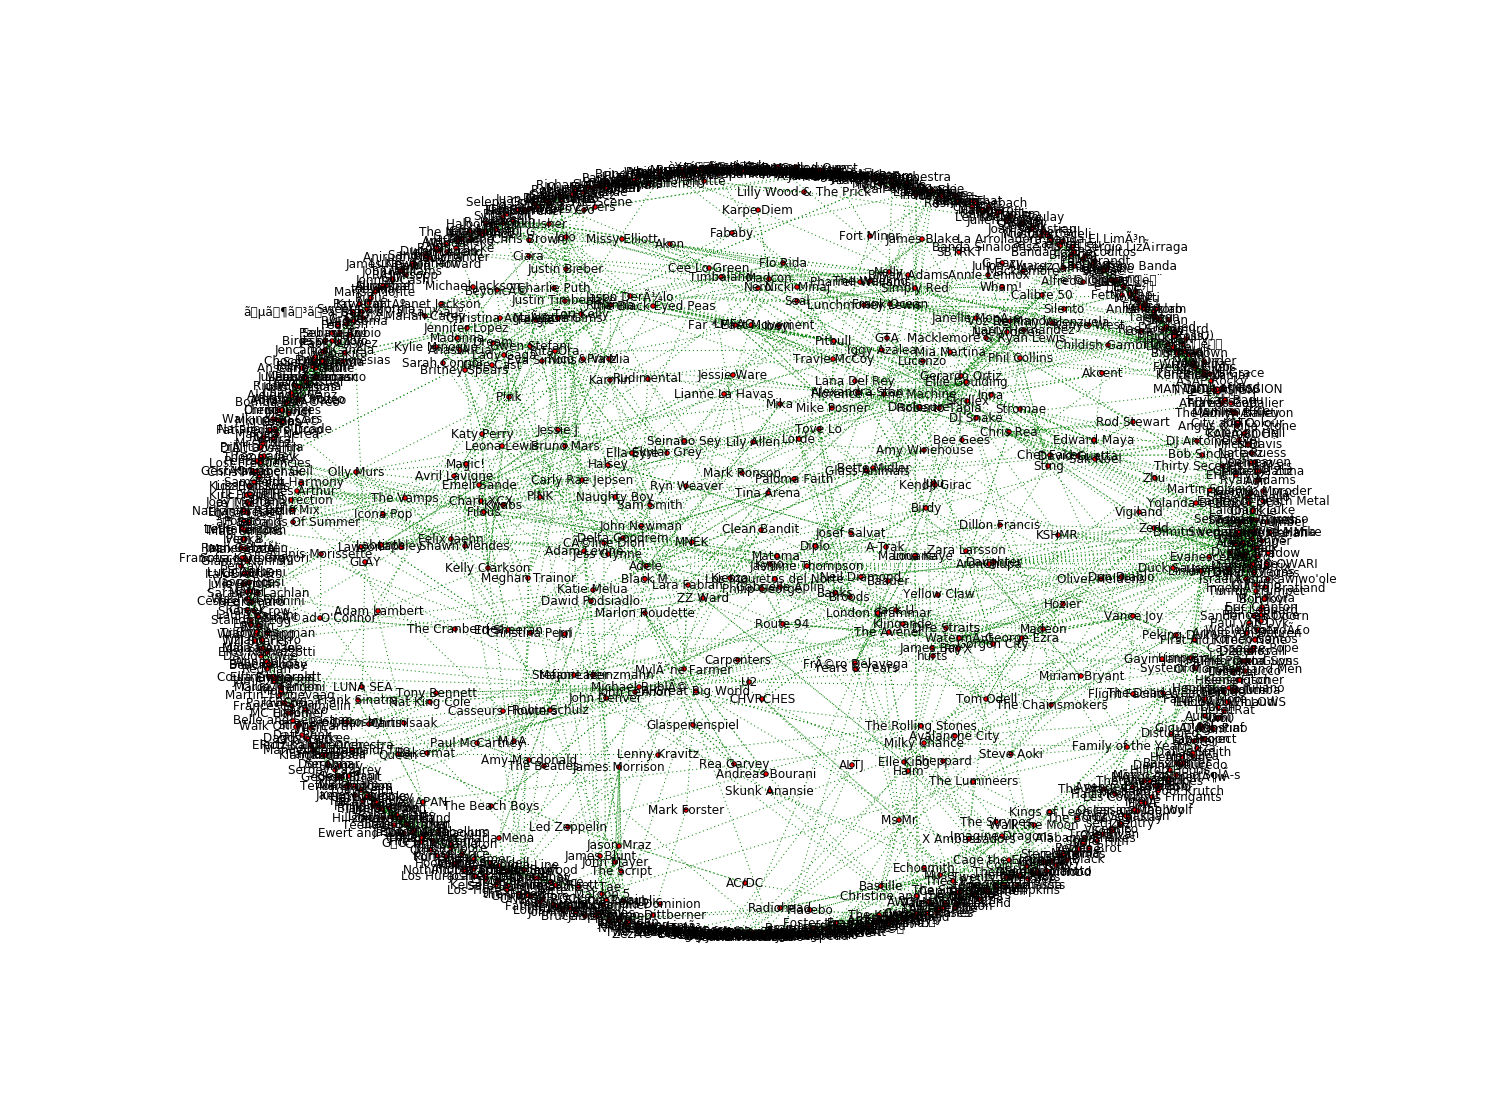

In [14]:
plt.figure(figsize = (20,15))
nx.draw(total_artist_graph,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green')

In [15]:
# compute degree Centrality
artists_degree = nx.degree(total_artist_graph)

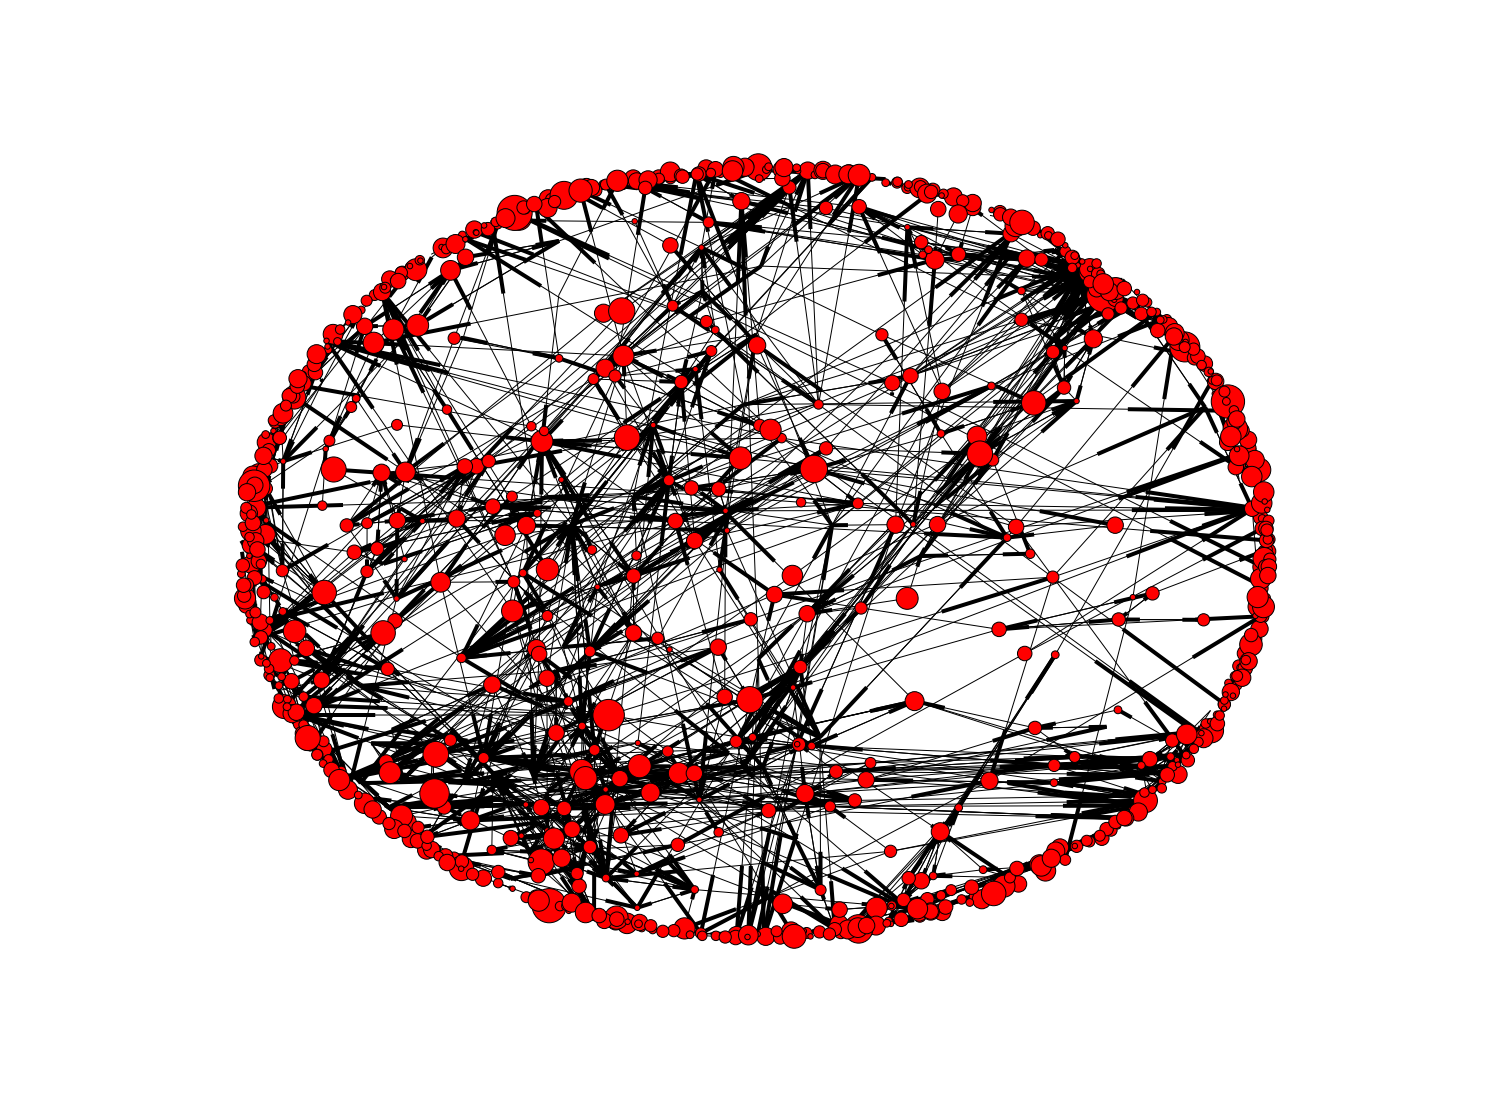

In [16]:
# visualize the network with the node size as a function of degree centrality
plt.figure(figsize = (20,15))
nx.draw(total_artist_graph,node_size=30*np.array(artists_degree.values()),with_labels=False,edge_color='black')

### Find artists which are network centers

In [ ]:
# output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)  # sort dictionary based on degree values
    for i in range(0,tn):
        print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [31]:
dict(((i,artists_degree.values().count(i)) for i in artists_degree.values()))

{0: 185,
 1: 99,
 2: 104,
 3: 75,
 4: 55,
 5: 67,
 6: 65,
 7: 64,
 8: 41,
 9: 48,
 10: 33,
 11: 31,
 12: 24,
 13: 18,
 14: 20,
 15: 14,
 16: 13,
 17: 4,
 18: 5,
 19: 6,
 20: 8,
 21: 3,
 22: 3,
 23: 3,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 29: 1,
 30: 1,
 33: 2,
 37: 1,
 39: 1,
 40: 1,
 41: 1}

In [ ]:
topdict(artists_degree,10)

In [ ]:
# Eigenvector Centrality
c2= nx.eigenvector_centrality_numpy(total_artist_graph)
topdict(c2,10)

In [1]:
# Betweeness Centrality
FCG=list(nx.connected_component_subgraphs(total_artist_graph, copy=True))[0]

NameError: name 'nx' is not defined

In [ ]:
c3 = nx.current_flow_betweenness_centrality(FCG)
topdict(c3,5)

In [ ]:
# Closeness Centrality
c4 = nx.closeness_centrality(FCG)
topdict(c4,5)

In [ ]:
# Pagerank Centrality
a = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
for i in a:
    c5 = nx.pagerank(total_artist_graph,i)
    print ('a={0}'.format(i))
    topdict(c5,5)

### Degree Distribution

In [17]:
#introduce auxiliary function visualizing the degree rank plots
def rankPlot(x,params=[]):
    #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
    #params - power-law fit cut-off
    xs=sorted(x,reverse=True) # sort the sequence in decreasing order
    plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
    plt.title("Centrality rank plot") #plot title
    #axe labels  
    plt.ylabel("Centrality")
    plt.xlabel("rank")
    fp=[]                  
    #lognormal fit
    xl=np.log(x[x>0])
    sigma=np.std(xl)
    mu=np.mean(xl)  
    fp=sigma
    s=np.exp(mu)*stats.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
    plt.loglog(s,'r-',marker='.')  
    plt.show()
    return fp 

In [18]:
#introduce a function visualizing degree partial and cumulative distributions
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(np.log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
        xh=1-np.cumsum(xh[:-1])
        xb=xb[:-1]
        plt.ylabel("P(c>=x)")
    else:
        plt.ylabel("p(c=x)")
    plt.loglog(np.exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

In [21]:
np.histogram(np.log(d),bins=10)

ValueError: The first argument of bincount must be non-negative

In [35]:
total_artist_graph.nodes()

[u'Man\xc3\xa1',
 u'Capital Cities',
 u'The Avener',
 u'C\xc5\x93ur De Pirate',
 u'Laidback Luke',
 u'Abraham Mateo',
 u'Kensington',
 u'Avicii',
 u'Rasmus Seebach',
 u'The Weeknd',
 u'Peking Duk',
 u'\xec\x95\x84\xec\x9d\xb4\xec\x9c\xa0 (IU)',
 u'Dillon Francis',
 u'Gavin James',
 u'Brigitte',
 u'Dave Gahan',
 u'Pia Mia',
 u'The Vamps',
 u'G-Eazy',
 u'Roberto Carlos',
 u'Oscar and the Wolf',
 u'James Blunt',
 u'Eminem',
 u'Nirvana',
 u'Fababy',
 u'Diplo',
 u'Red Foo',
 u'Darius Rucker',
 u'Ms Mr',
 u'Timmy Trumpet',
 u'Rascal Flatts',
 u'Wanda',
 u'Tan Bionica',
 u'Zhu',
 u'Gest\xc3\xb6rt aber Geil',
 u'The Prodigy',
 u'Funda Arar',
 u'Indila',
 u'SHINee',
 u'Three Days Grace',
 u'The Beatles',
 u'Erykah Badu',
 u'Berkay',
 u'\xeb\xb0\xb1\xec\x95\x84\xec\x97\xb0',
 u'Ariana Grande',
 u'Laura Pausini',
 u'Fritz Kalkbrenner',
 u'Choc Quib Town',
 u'Teflon Brothers',
 u'JoJo',
 u'Kelly Clarkson',
 u'a-ha',
 u'\xe6\xb1\xaa\xe5\xb3\xb0',
 u'Jauz',
 u'Family of the Year',
 u'Vigiland',
 u'R

In [19]:
#and visualize degree distributions for it
d=np.array(nx.degree(total_artist_graph).values())
plt.figure(figsize = (5,5))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (5,5))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (5,5))
rankPlot(d,[1])

ValueError: The first argument of bincount must be non-negative

### Recommendation

In [ ]:
# given a artist, find its most similar artists (only one edge away)

In [ ]:
# take 'Maroon 5' as an example
selected_artist = ('Maroon 5').encode('utf-8') 
shortest_path = nx.single_source_shortest_path(total_artist_graph,selected_artist)

In [ ]:
similar_artists_list = []
for key, value in shortest_path.iteritems():
    if len(value)==2:
        similar_artists_list.append(key)

In [ ]:
print 'Similar artists to {0} are:'.format(selected_artist)
for i in range(0,len(similar_artists_list)):
    a = similar_artists_list[i].encode('utf-8')  # handle wrongly encoded charater
    print ('{0}|{1}').format(i+1,a)

In [ ]:
mx = 0
x,y = 0,0
for i in range(len(total_artist_list)):
    for j in range(len(total_artist_list)):
        path_l = nx.shortest_path_length(total_artist_graph, total_artist_list[i], total_artist_list[j])
        print path_l
        if path_l >mx:
            mx = path_l
            x = i
            y = j

In [ ]:
a = 'Kygo'
b = 'Coldplay'
nx.shortest_path(total_artist_graph,a,b)